In [683]:
import pandas as pd
import numpy as np

In [684]:
import matplotlib.pyplot as plt
import seaborn as sns

In [685]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [686]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gen_sub = pd.read_csv('gender_submission.csv')

In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [688]:
gen_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [689]:
df = df.drop(columns= ["Ticket", 'Cabin', 'Embarked', 'Name'])


In [690]:
df.apply(lambda x: x.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [691]:
df.Sex = df.Sex.map({'male':1, 'female':0})

In [692]:
means = df.groupby(["Survived", 'Sex']).Age.mean()


In [693]:
df.Age = df.apply(lambda x: means.loc[x.Survived, x.Sex] if np.isnan(x.Age) else x, axis = 1).Age

In [694]:
df.apply(lambda x: x.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

<Axes: >

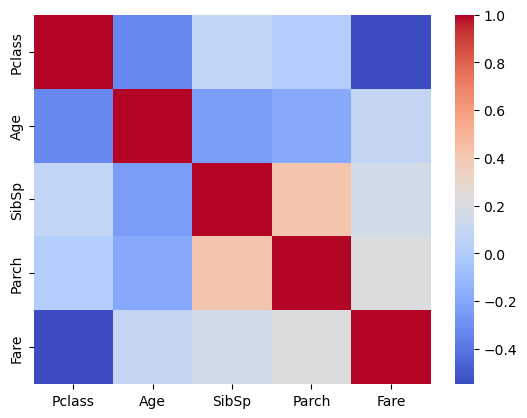

In [695]:
corrmap = df[['Pclass', 'Age','SibSp', 'Parch', 'Fare',]].corr()

sns.heatmap(corrmap, cmap = 'coolwarm')

In [696]:
tree = DecisionTreeClassifier(random_state=17)


In [697]:
x_train = df[['Pclass', 'Sex','Age','SibSp', 'Parch', 'Fare']]
y_train = df.Survived

In [698]:
params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': np.linspace(0.01,1, 100)
    
}

In [699]:
gs = GridSearchCV(estimator=tree, 
                  param_grid = params, 
                  scoring = 'accuracy',
                  refit = False,
                  cv = 10,
                  verbose = 4
                  )

In [700]:
gs.fit(x_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV 1/10] END criterion=gini, min_impurity_decrease=0.01, splitter=best;, score=0.822 total time=   0.0s
[CV 2/10] END criterion=gini, min_impurity_decrease=0.01, splitter=best;, score=0.843 total time=   0.0s
[CV 3/10] END criterion=gini, min_impurity_decrease=0.01, splitter=best;, score=0.775 total time=   0.0s
[CV 4/10] END criterion=gini, min_impurity_decrease=0.01, splitter=best;, score=0.854 total time=   0.0s
[CV 5/10] END criterion=gini, min_impurity_decrease=0.01, splitter=best;, score=0.831 total time=   0.0s
[CV 6/10] END criterion=gini, min_impurity_decrease=0.01, splitter=best;, score=0.787 total time=   0.0s
[CV 7/10] END criterion=gini, min_impurity_decrease=0.01, splitter=best;, score=0.798 total time=   0.0s
[CV 8/10] END criterion=gini, min_impurity_decrease=0.01, splitter=best;, score=0.742 total time=   0.0s
[CV 9/10] END criterion=gini, min_impurity_decrease=0.01, splitter=best;, score=0.865 total tim

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_impurity_decrease': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,....44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
                         'splitter': ['best', 'random']},
             refit=False, scoring='accuracy', verbose=4)

In [701]:
#besttree = gs.best_estimator_
gs.best_params_

{'criterion': 'entropy', 'min_impurity_decrease': 0.01, 'splitter': 'best'}

In [702]:
nt = DecisionTreeClassifier(max_depth=5)

In [703]:
nt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [704]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [705]:
test = test.drop(columns= ["Ticket", 'Cabin', 'Embarked', 'Name'])

In [706]:
means = test.groupby('Sex').mean().Age

In [707]:
test.Age = test.apply(lambda x: means.loc[x.Sex] if np.isnan(x.Age) else x, axis = 1).Age
test = test.fillna(test.Fare.median())

In [708]:
test.Sex = test.Sex.map({'male':1, 'female':0})

In [709]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [710]:
test.apply(lambda x: x.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [711]:
pred = besttree.predict(test.loc[:, test.columns != 'PassengerId'])

In [712]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [713]:
test = test.assign(prediction = pred)
test = test.merge(gen_sub, left_on = 'PassengerId', right_on= 'PassengerId')

In [714]:
accuracy_score(test.Survived, test.prediction)

0.9545454545454546

In [715]:
p = test[['PassengerId', 'prediction']]
p.rename(columns = {'prediction': 'Survived'}).set_index('PassengerId').to_csv('predict.csv')

In [716]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    # needs graphviz to be installed
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [717]:
tree_graph_to_png(besttree, ['Pclass', 'Sex','Age','SibSp', 'Parch', 'Fare'], 'aboba.png')

In [718]:
besttree.get_n_leaves

<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01,
                       random_state=17)>